# Customer Data Preprocessing & Analysis

# Data Processing

## 1. Reading the CSV data

In [291]:
# the first is to import the csv file containg customer data.
# used Python's built in CSV library
import csv
import json

# used csv.DictReader to read data into dictionaries.
with open ("acw_user_data.csv","r",newline="")as file:
    file_reader=csv.DictReader(file) 
    data=list(file_reader)
    
# used len function to see the length of the data    
print("Length of the Data:",len(data)) 
#fieldnames statement has been used to see the data fieldnames.
print('field_names  : ',file_reader.fieldnames[:])   


Length of the Data: 1000
field_names  :  ['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [292]:
# Going through each rows inside the data and printing them
for row in data:
    print(row)
        

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Dollar)': '7257', 'Retired': 'True', 'Yearly Salary (Dollar)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (Km)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Cre

## 2. Nesting the data

*Converting the falt structure data into Nested data*

In [293]:
# this list will contain all the proccessed data
Nested_data = []

# opening the CSV file , newline='' used to ensures correct handling of line breaks
with open ("acw_user_data.csv","r",newline="")as file:
    file_reader=csv.DictReader(file)
    
# Building nested dictionary for each customer
    for row in file_reader:
        individual = {
            'first_name': row['First Name'],
            'second_name':row['Last Name'],
            'age':row['Age (Years)'],
            'sex':row['Sex'],
            'retired':row['Retired'],
            'marital_status':row['Marital Status'],
            'dependants':row['Dependants'],
            'salary':row['Yearly Salary (Dollar)'],
            'pension':row['Yearly Pension (Dollar)'],
            'company':row['Employer Company'],
            'commute_distance':row['Distance Commuted to Work (Km)'],
            'vehicle':{
               'make':row['Vehicle Make'],
               'model':row['Vehicle Model'],
               'year':row['Vehicle Year'],
               'category':row['Vehicle Type']
            },
            'credit_card':{
               'start_date':row['Credit Card Start Date'],
               'end_date':row['Credit Card Expiry Date'],
               'number':row['Credit Card Number'],
               'ccv':row['Credit Card CVV'],
               'iban':row['Bank IBAN']
            },
            'Address':{
               'street':row['Address Street'],
               'city':row['Address City'],
               'postcode':row['Address Postcode']
            }
        }
        Nested_data.append(individual) # stores each person's dictionary into list


#checking the how many customers processed
print('Number of customer nested : ',len(Nested_data))

# converting the python list into printed Json string
print(json.dumps(Nested_data, indent=5))


Number of customer nested :  1000
[
     {
          "first_name": "Kieran",
          "second_name": "Wilson",
          "age": "89",
          "sex": "Male",
          "retired": "True",
          "marital_status": "married or civil partner",
          "dependants": "3",
          "salary": "72838",
          "pension": "7257",
          "company": "N/A",
          "commute_distance": "0",
          "vehicle": {
               "make": "Hyundai",
               "model": "Bonneville",
               "year": "2009",
               "category": "Pickup"
          },
          "credit_card": {
               "start_date": "08/18",
               "end_date": "11/27",
               "number": "676373692463",
               "ccv": "875",
               "iban": "GB62PQKB71416034141571"
          },
          "Address": {
               "street": "70 Lydia isle",
               "city": "Lake Conor",
               "postcode": "S71 7XZ"
          }
     },
     {
          "first_name": "Jonatha

#### Converted the flat CSV structure into nested structure
- Nested Vehicle
- Nested credit_card
- Nested Address

## 3. Cleaning the Data



**Handling the Dependants Errors**
- Some records has missing or empty dependants
- we will replace those with 0 and find the affected row(index)

In [294]:
## Creating two empty lists
Cleaned_data=[]
Problematic_rows = []

# Loop into each customer record and the enumerate gives the index number
for i,individual in enumerate(Nested_data):
    dependent=str(individual['dependants']).strip() # strip() removes extra spaces

     # checking for invaild dependants
    if dependent=="" or dependent.lower()=="nan":
        Problematic_rows.append(i) # save the index of affected row
        individual['dependants'] = 0
    Cleaned_data.append(individual)
    
print('Problematic rows:',Problematic_rows)

# prints the cleaned data as JSON
print(json.dumps(Cleaned_data,indent=5))

Problematic rows: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]
[
     {
          "first_name": "Kieran",
          "second_name": "Wilson",
          "age": "89",
          "sex": "Male",
          "retired": "True",
          "marital_status": "married or civil partner",
          "dependants": "3",
          "salary": "72838",
          "pension": "7257",
          "company": "N/A",
          "commute_distance": "0",
          "vehicle": {
               "make": "Hyundai",
               "model": "Bonneville",
               "year": "2009",
               "category": "Pickup"
          },
          "credit_card": {
               "start_date": "08/18",
               "end_date": "11/27",
               "number": "676373692463",
               "ccv": "875",
               "iban": "GB62PQKB71416034141571"
          },
          "Address": {
               "street": "70 Lydia isle",
               "city": "Lake Conor",
               "p

## 4. Formatting the Data

* After converting the data into nested data, need to make sure all the numerical values are stored as integers or floats 
* This prevents issue for further calculations 

In [295]:
processed_data = []
for individual in Cleaned_data:
    individual['age'] = int(individual['age'])
    individual['dependants']=int(individual['dependants'])
    individual['salary']=float(individual['salary'])
    individual['pension']=float(individual['pension'])
    individual['commute_distance']=float(individual['commute_distance'])
    individual['vehicle']['year'] = int(individual['vehicle']['year'])
    processed_data.append(individual)

print(json.dumps(processed_data, indent=5))

[
     {
          "first_name": "Kieran",
          "second_name": "Wilson",
          "age": 89,
          "sex": "Male",
          "retired": "True",
          "marital_status": "married or civil partner",
          "dependants": 3,
          "salary": 72838.0,
          "pension": 7257.0,
          "company": "N/A",
          "commute_distance": 0.0,
          "vehicle": {
               "make": "Hyundai",
               "model": "Bonneville",
               "year": 2009,
               "category": "Pickup"
          },
          "credit_card": {
               "start_date": "08/18",
               "end_date": "11/27",
               "number": "676373692463",
               "ccv": "875",
               "iban": "GB62PQKB71416034141571"
          },
          "Address": {
               "street": "70 Lydia isle",
               "city": "Lake Conor",
               "postcode": "S71 7XZ"
          }
     },
     {
          "first_name": "Jonathan",
          "second_name": "Thomas",
 

#### Creating processed json file

In [296]:
# Writes the cleaned , formatted datasets to processed.json file
with open('processed.json', 'w') as file:
    json.dump(processed_data, file, indent=5)

## 5. Creating retired data

In [297]:
# create a empty list to cantain retired customers
retired_data=[]

#loop through each processed individual
for individual in processed_data:
    if individual["retired"] == 'True':
        retired_data.append(individual)
        
# prints the number of retired
print("Length of retired data:",(len(retired_data)))
# prints the data as Json
print(json.dumps(retired_data,indent=5))


Length of retired data: 246
[
     {
          "first_name": "Kieran",
          "second_name": "Wilson",
          "age": 89,
          "sex": "Male",
          "retired": "True",
          "marital_status": "married or civil partner",
          "dependants": 3,
          "salary": 72838.0,
          "pension": 7257.0,
          "company": "N/A",
          "commute_distance": 0.0,
          "vehicle": {
               "make": "Hyundai",
               "model": "Bonneville",
               "year": 2009,
               "category": "Pickup"
          },
          "credit_card": {
               "start_date": "08/18",
               "end_date": "11/27",
               "number": "676373692463",
               "ccv": "875",
               "iban": "GB62PQKB71416034141571"
          },
          "Address": {
               "street": "70 Lydia isle",
               "city": "Lake Conor",
               "postcode": "S71 7XZ"
          }
     },
     {
          "first_name": "Clive",
          "

#### Creating retired json file

In [298]:
# Creating the JSON file that conatins only the retired customers
with open('retired.json','w') as retired_file:
    json.dump(retired_data,retired_file,indent=5)

## 6. Creating employed data

In [299]:
# this list will store the customers who is employed
employed_data=[]

#loop into every processed data
for employer in processed_data:
    # by using if statement checking if the person is employed
    if employer['company'].strip()!="" and employer['company'].strip().lower()!='n/a': # strip() removes extra spaces and lower() converts to lowercase 
        employed_data.append(employer) # adding the data to employed_data list
print(json.dumps(employed_data,indent=5))


[
     {
          "first_name": "Jonathan",
          "second_name": "Thomas",
          "age": 46,
          "sex": "Male",
          "retired": "False",
          "marital_status": "married or civil partner",
          "dependants": 1,
          "salary": 54016.0,
          "pension": 0.0,
          "company": "Begum-Williams",
          "commute_distance": 13.72,
          "vehicle": {
               "make": "Nissan",
               "model": "ATS",
               "year": 1996,
               "category": "Coupe"
          },
          "credit_card": {
               "start_date": "08/12",
               "end_date": "11/26",
               "number": "4529436854129855",
               "ccv": "583",
               "iban": "GB37UMCO54540228728019"
          },
          "Address": {
               "street": "00 Wheeler wells",
               "city": "Chapmanton",
               "postcode": "L2 7BT"
          }
     },
     {
          "first_name": "Antony",
          "second_name": "Jo

#### Creating employed json file

In [300]:
# Creating the JSON file that conatins only the employed customers
with open ('employed.json','w') as employed_file:
    json.dump(employed_data,employed_file,indent=5)
    

## 7. Removing Credit cards

*Going to write a separate file for any customer's credit card that has more than 10 years between their start and end date*

In [301]:
# the datetime module allows to convert string into real date object 
from datetime import datetime

# used function to calculate the difference between start and end in years
def long_period(start,end):
    start_date= datetime.strptime(start,'%m/%y')  # converts start date text into datetime object
    end_date=datetime.strptime(end,'%m/%y')  # converts end date text into datetime object
    year=(end_date.year - start_date.year) + (end_date.month - start_date.month)/12  # Calucating the total number of years
    return year > 10 

removed_card=[]
# loop through each processed individual and checks if the card should be removed
for individual in processed_data:
    card=individual['credit_card']
    if long_period(card['start_date'],card['end_date']):
        removed_card.append(individual)
        
# printing how many credit cards has been removed
print ('number of removed credit cards:',len(removed_card))
# prints the data as Json
print(json.dumps(removed_card,indent=5))
        

number of removed credit cards: 252
[
     {
          "first_name": "Jonathan",
          "second_name": "Thomas",
          "age": 46,
          "sex": "Male",
          "retired": "False",
          "marital_status": "married or civil partner",
          "dependants": 1,
          "salary": 54016.0,
          "pension": 0.0,
          "company": "Begum-Williams",
          "commute_distance": 13.72,
          "vehicle": {
               "make": "Nissan",
               "model": "ATS",
               "year": 1996,
               "category": "Coupe"
          },
          "credit_card": {
               "start_date": "08/12",
               "end_date": "11/26",
               "number": "4529436854129855",
               "ccv": "583",
               "iban": "GB37UMCO54540228728019"
          },
          "Address": {
               "street": "00 Wheeler wells",
               "city": "Chapmanton",
               "postcode": "L2 7BT"
          }
     },
     {
          "first_name": "J

#### Creating Removed card file

In [302]:
# This file contain all the customer with their credi card that span more than 10 years 
with open ('remove_ccard.json','w')as card_file:
    json.dump(removed_card,card_file,indent=5)

## 8. Salary Commute

In [303]:
# Loading the processed JSON file
with open ('processed.json','r')as processed_file:
    processed_data=json.load(processed_file)   

In [304]:
commute_data=[]
# Lterates through processed data
for data in processed_data:
    salary=data['salary']
    distance=data['commute_distance']
    # calculating salary commute metric
    if distance<=1:
        salary_commute=salary
    else:
        salary_commute=(salary)/(distance)
        
        # Adding new metric to the record and rounded the value to 2 decimal
    data['Salary-Commute']=round(salary_commute,2)
    commute_data.append(data)

# Sorting the data by ascending order   
sorted_commute=sorted(commute_data, key=lambda x: x['Salary-Commute'])

# prints the full sorted list in JSON
print(json.dumps(sorted_commute,indent=5))

[
     {
          "first_name": "Graeme",
          "second_name": "Jackson",
          "age": 52,
          "sex": "Male",
          "retired": "False",
          "marital_status": "single",
          "dependants": 2,
          "salary": 17046.0,
          "pension": 0.0,
          "company": "Smith, Birch and Burke",
          "commute_distance": 5.52,
          "vehicle": {
               "make": "Chevrolet",
               "model": "Rally Wagon 1500",
               "year": 2011,
               "category": "SUV"
          },
          "credit_card": {
               "start_date": "06/14",
               "end_date": "04/29",
               "number": "4713424668774153",
               "ccv": "3053",
               "iban": "GB09ELJH35362236053720"
          },
          "Address": {
               "street": "Studio 9 Reid lights",
               "city": "South Ryan",
               "postcode": "E27 9GY"
          },
          "Salary-Commute": 3088.04
     },
     {
          "first_

#### Creating Commute json file

In [305]:
# This file contains all customer records sorted by salary commute 
with open ('commute.json','w')as commute_file:
    json.dump(sorted_commute,commute_file, indent=5)

# Data Visualisation

In [306]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load the CSV file (data) into pandas dataframe
df=pd.read_csv('acw_user_data.csv')
df # display datafram

Address Street    Address City Address Postcode  Age (Years)  \
0                70 Lydia isle      Lake Conor          S71 7XZ           89   
1             00 Wheeler wells      Chapmanton           L2 7BT           46   
2         Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3    Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4       Flat 3 Christine views    Fletcherstad          WS2 9SN           57   
..                         ...             ...              ...          ...   
995   Studio 6 Heather prairie    North Amelia           E9 0HB           48   
996          Flat 3 Davies run      Greenshire           E7 4UJ           22   
997     Flat 7 Barber motorway    Burrowsshire          L62 8TA           38   
998              00 Tony forks       Abbiebury          NP4 1JL           45   
999       Flat 9 Mohamed route       West Glen         LL3M 4WS           80   

     Distance Commuted to Work (Km)          Employer Company  \
0                              0.00                       NaN   
1                             13.72            Begum-Williams   
2                             16.02               Hill-Wright   
3                             19.35                 Green LLC   
4                              5.94  Hill, Evans and Harrison   
..                              ...                       ...   
995                           18.44             Phillips-Pope   
996                           19.61                Hughes LLC   
997                            6.66              Bailey Group   
998                           18.13              Foster-Price   
999                            0.00                       NaN   

    Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                    08/18                   11/27         676373692463   
1                    08/12                   11/26     4529436854129855   
2                    11/19                   07/27  4091726363083888495   
3                    10/17                   04/18  4671332769487632633   
4                    04/19                   11/27     2245094149128526   
..                     ...                     ...                  ...   
995                  04/19                   08/26     3563802099155576   
996                  05/12                   07/28     3591311819315276   
997                  01/13                   05/29     3584931475767707   
998                  04/19                   05/23     4090311300716168   
999                  12/14                   01/16      180020306382110   

     Credit Card CVV  ...  Last Name            Marital Status  \
0                875  ...     Wilson  married or civil partner   
1                583  ...     Thomas  married or civil partner   
2                422  ...      Jones  married or civil partner   
3                669  ...       Shaw  married or civil partner   
4                659  ...    O'Brien  married or civil partner   
..               ...  ...        ...                       ...   
995              908  ...      Clark  married or civil partner   
996              675  ...      Jones  married or civil partner   
997              679  ...     Walker                    single   
998              775  ...    Thomson  married or civil partner   
999              903  ...    Russell                    single   

    Yearly Pension (Dollar) Retired Yearly Salary (Dollar)     Sex  \
0                      7257    True                  72838    Male   
1                         0   False                  54016    Male   
2                         0   False                  68049    Male   
3                         0   False                  91337    Male   
4                         0   False                  18446  Female   
..                      ...     ...                    ...     ...   
995                       0   False                  84645    Male   
996                 

In [307]:
# prints each column name in dataframe
for col in df:
    print(col)

Address Street
Address City
Address Postcode
Age (Years)
Distance Commuted to Work (Km)
Employer Company
Credit Card Start Date
Credit Card Expiry Date
Credit Card Number
Credit Card CVV
Dependants
First Name
Bank IBAN
Last Name
Marital Status
Yearly Pension (Dollar)
Retired
Yearly Salary (Dollar)
Sex
Vehicle Make
Vehicle Model
Vehicle Year
Vehicle Type


In [308]:
# extracts yearly salary column from dataframe 
salary = df[['Yearly Salary (Dollar)']]
# extracts age column from dataframe 
age = df[['Age (Years)']]

# prints extracted columns
print(salary)
print(age)

     Yearly Salary (Dollar)
0                     72838
1                     54016
2                     68049
3                     91337
4                     18446
..                      ...
995                   84645
996                   93314
997                   20940
998                   82412
999                   25788

[1000 rows x 1 columns]
     Age (Years)
0             89
1             46
2             22
3             56
4             57
..           ...
995           48
996           22
997           38
998           45
999           80

[1000 rows x 1 columns]


## 1. Calculating mean salary and meadian age

In [309]:
# Calculate the average (mean) value of the salary
Mean_Salary = salary.mean()
# Calculate the middle (median) value of the age
Median_Age = age.median()

# prints mean salary nad median age 
print('Mean_Salary:',Mean_Salary)
print('Median_Age',Median_Age)

Mean_Salary: Yearly Salary (Dollar)    57814.078
dtype: float64
Median_Age Age (Years)    54.0
dtype: float64


## 2 .Univariate Plots

### 2a. Age Distribution

Minimum_Age is: 18
Maximum_Age is: 91
Bin_width is: 5
Number_of_bins are: 15


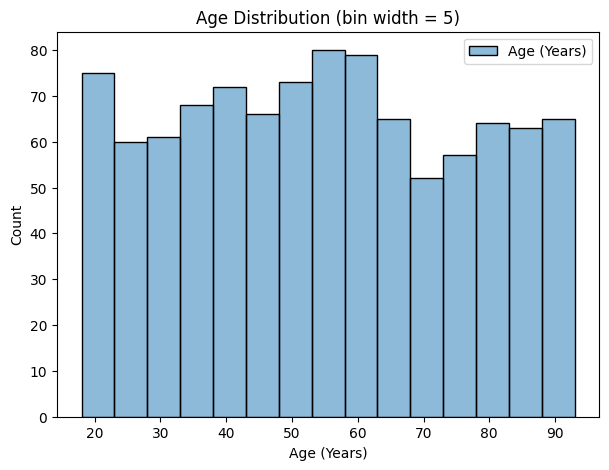

In [310]:
# Identifing the lowest and highest values for customer ages
min_age = int(age.min().item())
max_age = int(age.max().item())

#defining the bin width
bin_width= 5

#Calculating the total number of bins using the ceiling function  
num_bins = math.ceil((max_age - min_age) / bin_width)

# Shows the calculated age range and details about the bins
print("Minimum_Age is:", min_age)
print("Maximum_Age is:", max_age)
print("Bin_width is:", bin_width)
print("Number_of_bins are:", num_bins)

# Generating the histogram to illustrate the distribution of ages
Age_Histogram = plt.figure(figsize=(7,5))
sns.histplot(age, bins=range(min_age, max_age + bin_width, bin_width))

# Adding informative title and axis labels
plt.title("Age Distribution (bin width = 5)")
plt.xlabel("Age (Years)")
plt.ylabel("Count")

# Displays the plot
plt.show()

### 2b. Dependants Count

*will have to examine the number of dependents each customer has. But, certain records have missing or empty values in ,so it require cleaning*

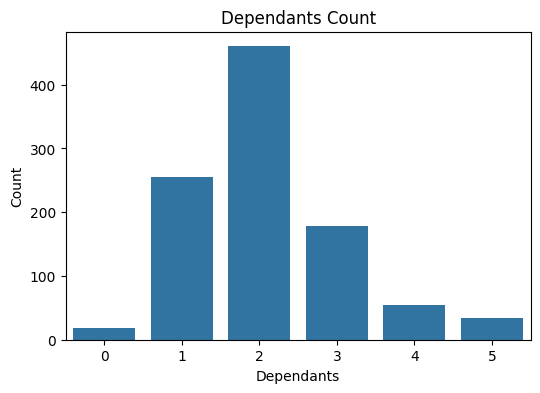

In [311]:
# Replacing the blanks, missing dependants with 0
df["Dependants"] = df["Dependants"].replace(r"^\s*$", 0, regex=True)
df["Dependants"] = df["Dependants"].fillna(0)
df["Dependants"] = df["Dependants"].astype(int)

# Plot the dependants per customer
Dependant_count=plt.figure(figsize=(6,4))
sns.countplot(x="Dependants", data=df)

# Adding informative title and axis labels
plt.title("Dependants Count")
plt.xlabel("Dependants")
plt.ylabel("Count")

# Displays the plot
plt.show()


### 2c. Age Distribution conditioned on Marital Status

*Developed univariate plot to investigate how age differs among customers based on their marital status*

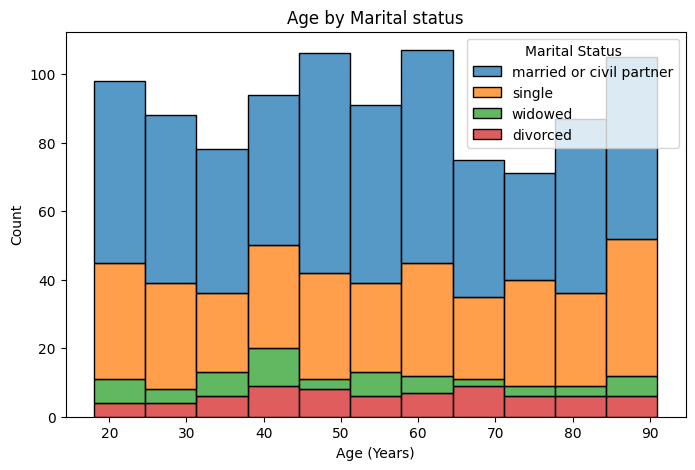

In [312]:
# Created histogram to visualize age distribution conditioned by marital status
Age_Marital_status=plt.figure(figsize=(8,5))
# By incorporating the hue='Marital Status' argument in Seaborn’s histplot(), we can display several distributions within a single chart 
sns.histplot(data=df,x='Age (Years)',hue='Marital Status', multiple='stack')

# Adding informative title and axis labels
plt.title('Age by Marital status')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

# Displays the plot
plt.show()

## 3.Multivariate plots

### 3a. Commute Distance vs Salary

*Here going to analyze wheter there is an connection between the distance of commutes and the annual salary*
*, so by using seaborn scatter plots going to visualize how customer's commuting distance correlates with their income*

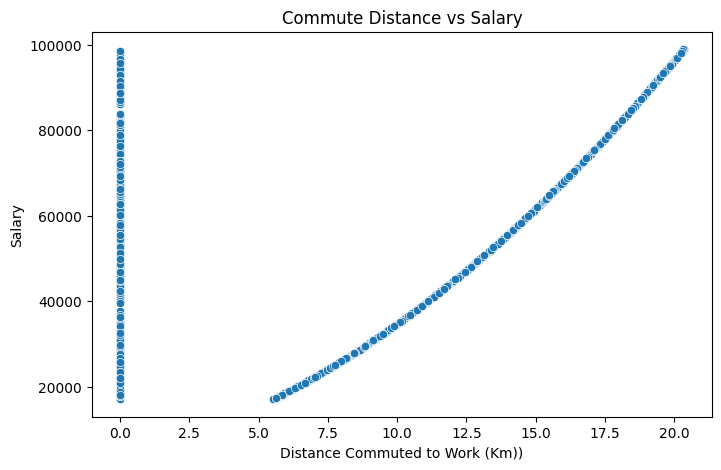

In [313]:
# creating scatter plots to visualize the relationship between commute distance and salary
commute_dis_salary=plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Distance Commuted to Work (Km)',y='Yearly Salary (Dollar)')

# Adding title and axis label
plt.title('Commute Distance vs Salary')
plt.xlabel('Distance Commuted to Work (Km))')
plt.ylabel('Salary')

# Display the plot
plt.show()

### 3b. Age vs Salary

*Here going to analyze the relationship between salary and age among the customers,By using seaborn scatter plot going to visualize datapoints point, with*
- X-asis showing customer's age
- Y-asix showing yearly salary

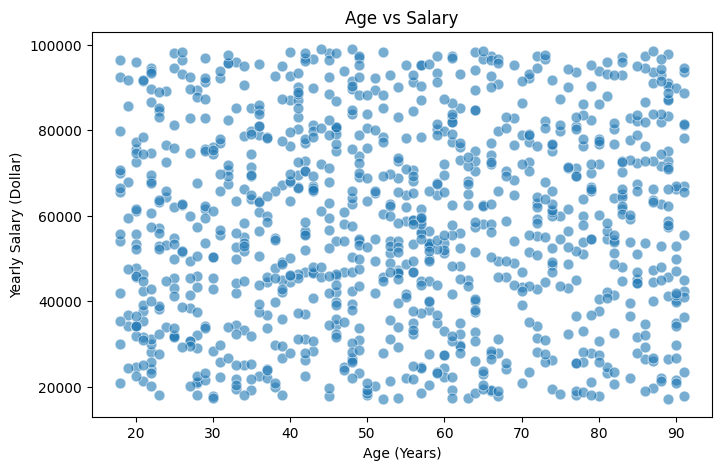

In [314]:
#creating scatter plots to visualize the relationship between age and salary
age_salary=plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Age (Years)',y='Yearly Salary (Dollar)',alpha=0.6,s=60)

# Adding title and axis label
plt.title('Age vs Salary')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (Dollar)')

# Display the plot
plt.show()

### 3c. Age vs Salary by Dependants

*Here going to analyze the relationship between age and salary varies based on the number of dependents,by using using seaborn scatter plot going to visualize individual customer as datapoints*

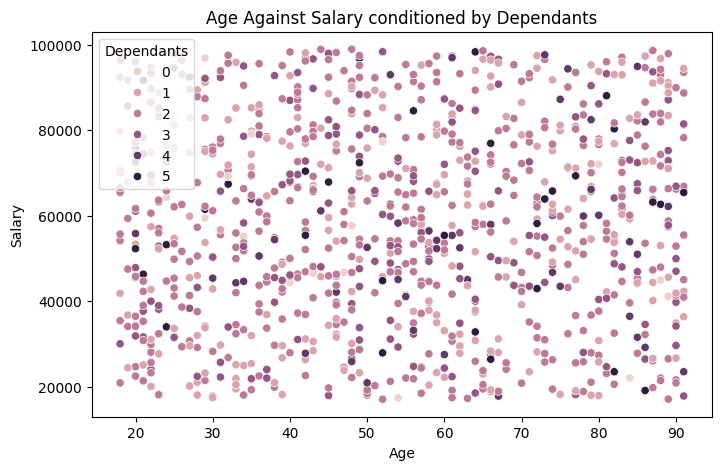

In [315]:
#creating scatter plots to visualize the relationship between age and salary with dependants
age_salary_dependants=plt.figure(figsize=(8,5)) 
sns.scatterplot(data=df,x='Age (Years)',y='Yearly Salary (Dollar)',hue='Dependants')

# Adding title and axis label
plt.title('Age Against Salary conditioned by Dependants') 
plt.xlabel('Age') 
plt.ylabel('Salary')

# Display the plot
plt.show()

### Saving all the plots to the file

*Once all the necessary visualizations have been created with Matplotlib and Seaborn, need to export the each plot as an image file. We will save all the plots in a straightforward simple way since we previously assigned variables to each plot.*

In [316]:
# Age_Histogram
Age_Histogram.savefig('Age_Histogram.png',bbox_inches='tight')

# Dependant_count
Dependant_count.savefig('Dependents_count.png',bbox_inches='tight')

#Age by Marital Status
Age_Marital_status.savefig('Age_martial_status.png',bbox_inches='tight')

#Commuted distance against salary
commute_dis_salary.savefig('commute_dis_salary.png',bbox_inches='tight')

#Age against Salary
age_salary.savefig('age_salary.png',bbox_inches='tight')

#Age against Salary conditioned by Dependants
age_salary_dependants.savefig('age_salary_dependants.png',bbox_inches='tight')

# The .savefig() method in Matplotlib is used to save each plot as a .png file. 
# By setting the parameter bbox_inches='tight', the saved image will cut away any excess white space
# resulting in a neat and easily readable final product.

### Thank You